<a href="https://colab.research.google.com/github/pradeepbiswal/ARCH/blob/main/BinaryClassification03_30_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import time

In [2]:
# Load the Covertype dataset from sklearn.datasets
data = fetch_covtype()
X = data.data
y = data.target

# Define feature names
feature_names = [f'f{i}' for i in range(X.shape[1])]

# Print feature names
print("Feature Names:")
print(feature_names)

Feature Names:
['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53']


In [5]:
# Original class names in the dataset
class_names = {
    1: "Lodgepole Pine",
    2: "Spruce/Fir",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"
}

# Display class distribution in the original dataset
original_class_counts = pd.Series(y).value_counts()
print("\nOriginal class distribution in the dataset:")
print(original_class_counts)

# Print class names for each class ID
print("\nClass Names in Original Dataset:")
for class_id, class_name in class_names.items():
    print(f"Class {class_id}: {class_name}")


Original class distribution in the dataset:
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

Class Names in Original Dataset:
Class 1: Lodgepole Pine
Class 2: Spruce/Fir
Class 3: Ponderosa Pine
Class 4: Cottonwood/Willow
Class 5: Aspen
Class 6: Douglas-fir
Class 7: Krummholz


In [6]:
# Select classes 1 and 2 for a binary classification task
# Class 1: Lodgepole Pine, Class 2: Spruce/Fir
subset_indices = np.isin(y, [1, 2])
X_subset = X[subset_indices]
y_subset = y[subset_indices]
y_binary = (y_subset == 1).astype(int)  # Class 1 as positive class, others as negative class

# Print class distribution in the binary classification dataset
binary_class_counts = pd.Series(y_binary).value_counts()
print("\nBinary class distribution in the original dataset:")
print(binary_class_counts)


Binary class distribution in the original dataset:
0    283301
1    211840
Name: count, dtype: int64


In [7]:
# Print class distribution in a sample of 10,000 examples
np.random.seed(42)  # Set random seed for reproducibility
indices = np.random.choice(X_subset.shape[0], size=10000, replace=False)  # Generate 10,000 random indices
X_subset = X_subset[indices]  # Select samples from X using these indices
y_binary = y_binary[indices]  # Select samples from y using these indices

subset_class_counts = pd.Series(y_binary).value_counts()
print("\nSample distribution in the 10,000 subset:")
print(subset_class_counts)

# Print class names for the subset
print("\nClasses in the 10,000 subset:")
for class_id, class_name in class_names.items():
    if class_id in [1, 2]:  # Only print classes involved in binary classification
        print(f"Class {class_id}: {class_name}")


Sample distribution in the 10,000 subset:
0    5737
1    4263
Name: count, dtype: int64

Classes in the 10,000 subset:
Class 1: Lodgepole Pine
Class 2: Spruce/Fir


In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_binary, test_size=0.2, random_state=42)

In [9]:
# Define models
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=200)),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=100)
}

In [10]:
"""
Train: Record the time, train the model, and calculate the training duration.
Predict: Record the time, make predictions and obtain probabilities, and calculate the prediction duration.
Metrics: Compute accuracy, precision, recall, F1 score, and AUC-ROC.
Handle errors: Log any issues encountered during training, prediction, or metrics calculation.
Store: Save the model’s performance metrics and times in the results list.
"""

# Store evaluation results
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"\nProcessing model: {name}")

    # Record start time
    train_start_time = time.time()

    # Train the model
    try:
        model.fit(X_train, y_train)
    except Exception as e:
        print(f"Error training model {name}: {e}")
        continue

    # Record end time
    train_end_time = time.time()

    # Calculate training time
    train_time = train_end_time - train_start_time

    # Record start time for prediction
    predict_start_time = time.time()

    # Predict
    try:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    except Exception as e:
        print(f"Error predicting with model {name}: {e}")
        continue

    # Record end time for prediction
    predict_end_time = time.time()

    # Calculate prediction time
    predict_time = predict_end_time - predict_start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    # Store results
    results.append({
        "Model": name,
        "Training Time (s)": train_time,
        "Prediction Time (s)": predict_time,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_roc
    })


Processing model: Logistic Regression

Processing model: Naive Bayes

Processing model: Decision Tree

Processing model: K-Nearest Neighbors

Processing model: Support Vector Machine

Processing model: Random Forest

Processing model: Gradient Boosting

Processing model: Neural Network


In [11]:
# Print Results
# Convert results to DataFrame for converts the list of model evaluation metrics into a Pandas DataFrame,
# providing a tabular view that simplifies reading and analysis.
results_df = pd.DataFrame(results)

# Print model evaluation results
print("\nModel evaluation results:")
print(results_df)

results_df



Model evaluation results:
                    Model  Training Time (s)  Prediction Time (s)  Accuracy  \
0     Logistic Regression           0.070391             0.003185    0.7750   
1             Naive Bayes           0.007866             0.003441    0.6170   
2           Decision Tree           0.112520             0.002088    0.7605   
3     K-Nearest Neighbors           0.001731             0.317987    0.8120   
4  Support Vector Machine          24.598841             3.546769    0.7630   
5           Random Forest           1.848101             0.102659    0.8445   
6       Gradient Boosting           2.618642             0.009407    0.7960   
7          Neural Network           4.823087             0.014037    0.7695   

   Precision    Recall  F1 Score   AUC-ROC  
0   0.739130  0.712575  0.725610  0.845739  
1   0.523909  0.905389  0.663740  0.794634  
2   0.707944  0.725749  0.716736  0.755578  
3   0.774194  0.776048  0.775120  0.889161  
4   0.723115  0.700599  0.711679  0.

,Model,Training Time (s),Prediction Time (s),Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.070391,0.003185,0.7750,0.739130,0.712575,0.725610,0.845739
1,Naive Bayes,0.007866,0.003441,0.6170,0.523909,0.905389,0.663740,0.794634
2,Decision Tree,0.112520,0.002088,0.7605,0.707944,0.725749,0.716736,0.755578
3,K-Nearest Neighbors,0.001731,0.317987,0.8120,0.774194,0.776048,0.775120,0.889161
4,Support Vector Machine,24.598841,3.546769,0.7630,0.723115,0.700599,0.711679,0.836210
5,Random Forest,1.848101,0.102659,0.8445,0.828321,0.791617,0.809553,0.916206
6,Gradient Boosting,2.618642,0.009407,0.7960,0.765217,0.737725,0.751220,0.868277
7,Neural Network,4.823087,0.014037,0.7695,0.752703,0.667066,0.707302,0.838639


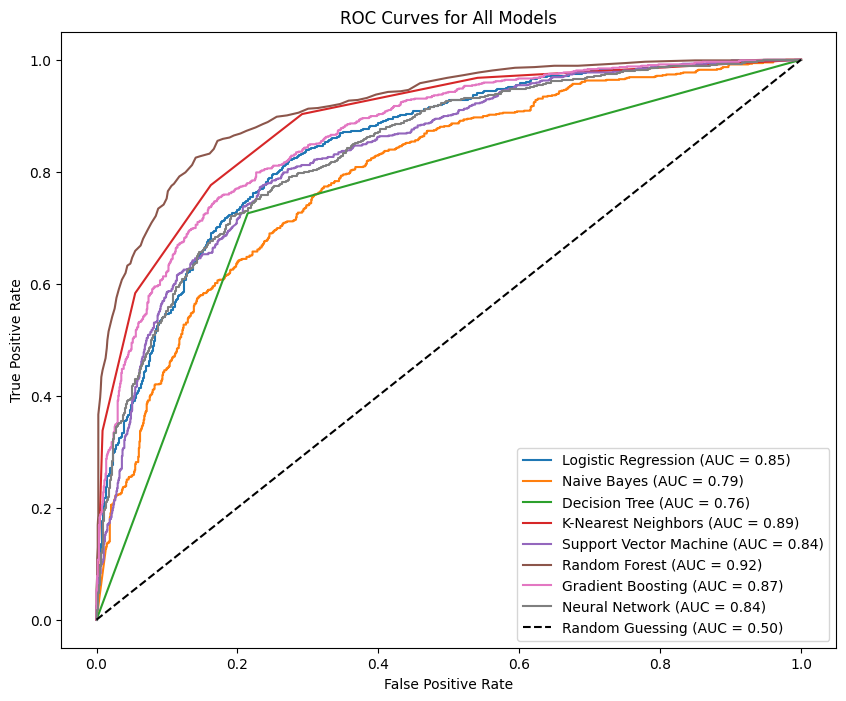

In [12]:
#ROC Curves Visualization

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        # Predict probabilities for the positive class
        y_proba = model.predict_proba(X_test)[:, 1]

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        # Calculate AUC-ROC score
        auc_roc = roc_auc_score(y_test, y_proba)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_roc:.2f})')
    except Exception as e:
        print(f"Error plotting ROC curve for model {name}: {e}")

# Plot a diagonal line for reference (random guessing)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='best')  # Ensure the legend includes the diagonal line

# Display the plot
plt.show()
